<a href="https://colab.research.google.com/github/IM07813/tfbasics/blob/main/Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#regression model
1. linear regression 
 1. it makes the relation between independent and dependent variables through a line of best fit
2. non-linear regression models:
   1. they do exist, but are far more complex

   input or independent variables are features, 

   output or dependent variables are labels





In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-8., -6., -2., 1. , 2, 5., 8., 11.])
Y = X + 10

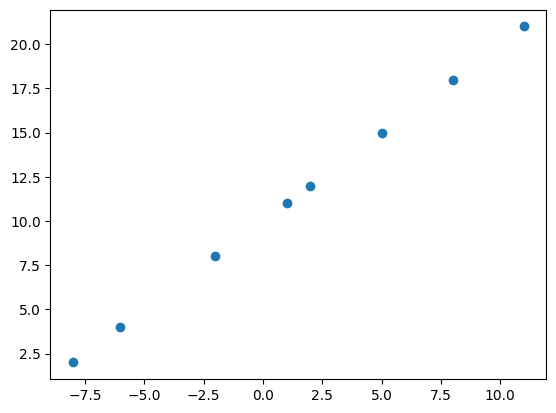

In [2]:
plt.scatter(X,Y);

In [3]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([564333])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([564333], dtype=int32)>)

In [4]:
X = tf.cast(tf.constant(X),dtype = tf.float32)
Y = tf.cast(tf.constant(Y), dtype = tf.float32)

In [5]:
print(X)
print(Y)
X[0].shape

tf.Tensor([-8. -6. -2.  1.  2.  5.  8. 11.], shape=(8,), dtype=float32)
tf.Tensor([ 2.  4.  8. 11. 12. 15. 18. 21.], shape=(8,), dtype=float32)


TensorShape([])

In [6]:
Y.shape
from tensorflow import keras
import tensorflow as tf



1. getting data ready

2. creating a model- define the input and output layers, as well as the hidden layers of a DLM.
3. Compiling a model - define the loss function that tells the function how wrong it is and the optimizer which tells the model how to improve the patterns that it's learning and evaluation matrix is what we can use to interpret the performance of our model. 
4. fitting a model - letting model try to find patterns between X and Y. 

#.Sequential means that go layer after layer in a sequence manner



In [7]:

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = None),
    tf.keras.layers.Dense(100, activation = None),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['mae'])


In [8]:
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 991ms/step - loss: 11.2454 - mae: 11.2454
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0239 - mae: 11.0239
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8016 - mae: 10.8016
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5780 - mae: 10.5780
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.3524 - mae: 10.3524
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1241 - mae: 10.1241
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.8923 - mae: 9.8923
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 9.6564 - mae: 9.6564
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4157 - mae: 9.4157
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 9.1696 - mae: 9.1696
Epoch 11/100
1/1 [==============================] - 0s 7ms/st

#time for predictions



In [9]:
X,Y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-8., -6., -2.,  1.,  2.,  5.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 2.,  4.,  8., 11., 12., 15., 18., 21.], dtype=float32)>)

In [10]:
model.predict([2]) #still bad prediction

1/1 [==============================] - 0s 100ms/step


array([[12.598163]], dtype=float32)

In [29]:
y_pred_1= model.predict(X)
mse_1 = tf.metrics.mean_squared_error (y_true = Y,
                                    y_pred = tf.squeeze(y_pred_1))
mae_1 = tf.metrics.mean_absolute_error(y_true = Y,
                                       y_pred = tf.squeeze(y_pred_1))

3/3 [==============================] - 0s 3ms/step


#improving the model
1. increase hidden layers or alter hidden neurons by increasing them
2. use a different activation and optimizers in compiling step and change the learning rate
3. change the epochs to a large number 
4. make your dataset large 


In [11]:
#make a bigger dataset
X = tf.range(-200, 200, 5)

In [12]:
Y= X+10
len(X), len(Y)

(80, 80)

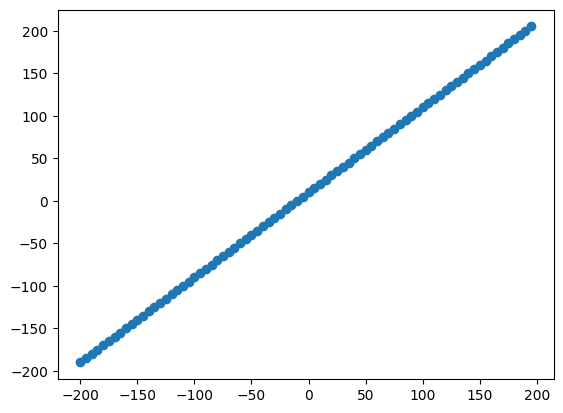

In [13]:
plt.scatter(X,Y)

In [14]:
X_train = X[:60]
Y_train = Y[:60]

X_test = X[60:]
Y_test = Y[60:]

In [15]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(60, 60, 20, 20)

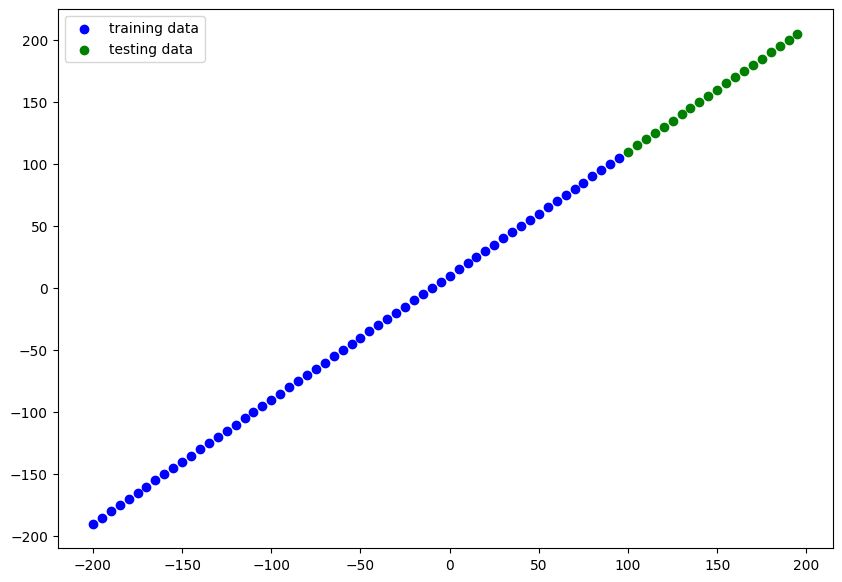

In [16]:
plt.figure(figsize =(10,7))
plt.scatter(X_train, Y_train, c = 'b', label = 'training data')
plt.scatter(X_test, Y_test, c = 'g', label = 'testing data')
plt.legend();

In [17]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = None),
    tf.keras.layers.Dense(100, activation = None),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['mae'])

In [18]:
model.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 90.4160 - mae: 90.4160
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 61.4810 - mae: 61.4810
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 35.2404 - mae: 35.2404
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 12.1869 - mae: 12.1869
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 19.7241 - mae: 19.7241
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 28.3369 - mae: 28.3369
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 26.9557 - mae: 26.9557
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 19.9815 - mae: 19.9815
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0075 - mae: 11.0075
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3512 - mae: 10.3512
Epoch 11/100
2/2 [==============================] - 0s 8

In [23]:
y_pred= model.predict(X_test)
y_pred.shape

1/1 [==============================] - 0s 71ms/step


(20, 1)

#plot function:


In [20]:
def plot_predict(train_data = X_train, 
                 train_labels = Y_train,
                 test_data = X_test,
                 test_labels=Y_test,
                 predictions= y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c = 'b', label= 'train_data')
  plt.scatter(test_data, test_labels, c='g', label= 'testing data')
  plt.scatter(test_data, predictions, c = 'r', label = 'predictions')
  plt.legend();

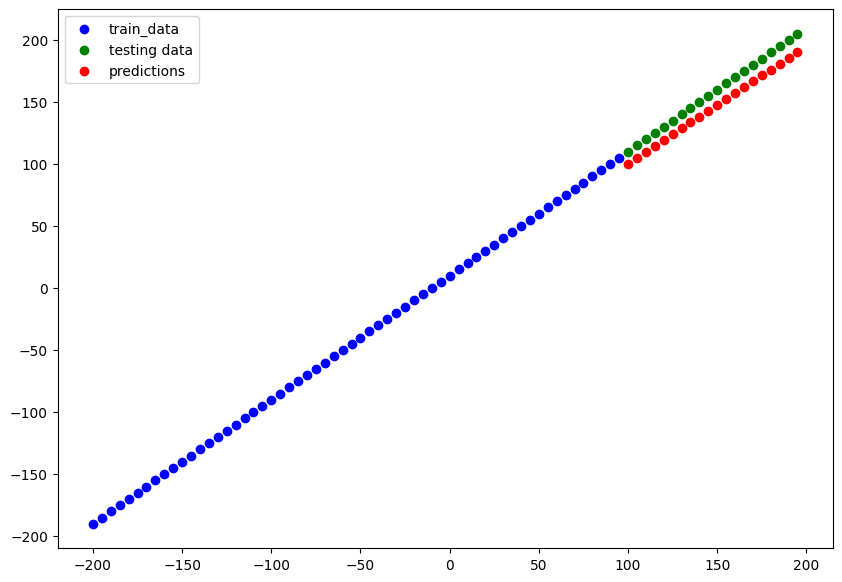

In [21]:
plot_predict()

#evaluating model:
1. MAE: mean-absolute error, it tells us, how far off are our model's predictions
2. MSE: mean-squared-error, it tells us, how far off are our model's predictions after squaring the averages 

In [22]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 278ms/step - loss: 12.1186 - mae: 12.1186


[12.118612289428711, 12.118612289428711]

In [31]:
#calculate the mean-absolute-error
#good for any regression problem
mae_2 = tf.metrics.mean_absolute_error(y_true = Y_test,
                                     y_pred = tf.squeeze(y_pred))
mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=12.118608>

In [32]:
#calculate the mean-square-error
#when larger errors are more significant than smaller errors
mse_2 = tf.metrics.mean_squared_error (y_true = Y_test,
                                    y_pred = tf.squeeze(y_pred))
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=149.17404>

In [34]:
import pandas as pd
model_results = [["model-1", mae_1.numpy(), mse_1.numpy()],
                 ["model-2", mae_2.numpy(), mse_2.numpy()]]
all_results = pd.DataFrame(model_results, columns =['model-1', 'mae', 'mse'])
all_results

,model-1,mae,mse
0,model-1,6.113547,54.787010
1,model-2,12.118608,149.174042


In [ ]:
#something to remind me on github